In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys
import numpy.linalg as linalg
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
from networkx.algorithms import bipartite
import sympy as sp

In [2]:
def show_matrix(data):
    min_val, max_val = 0, 15
    cm = sns.light_palette("blue", as_cmap=True)
    x=pd.DataFrame(data)
    x=x.style.background_gradient(cmap=cm)
    display(x)

In [3]:
def calculate_second_egein(norm_Lapl):
    val, vec = np.linalg.eigh(norm_Lapl)
    val = val.real
    vec = vec.real
    idx = np.argsort(val)
    val = val[idx]
    vec = vec[:,idx]
    return val,vec

In [4]:
def create_graph():
    G = nx.Graph()
    G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
    G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (5, 7), (5, 8), (6, 7), (7, 8), (6, 8)])
    return G

In [5]:
def show_graph(G):
    plt.figure(figsize=(15, 15))
    plt.subplot(121)
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.show()

In [6]:
G = create_graph()

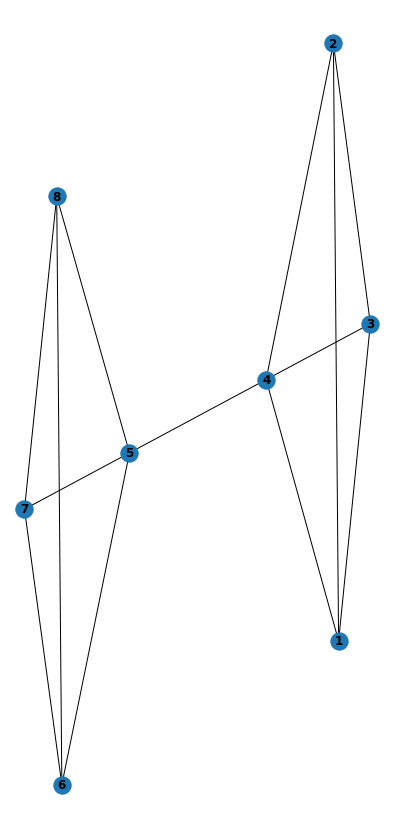

In [7]:
show_graph(G)

In [8]:
A = nx.convert_matrix.to_numpy_array(G, dtype=int)
show_matrix(A)

,0,1,2,3,4,5,6,7
0,0,1,1,1,0,0,0,0
1,1,0,1,1,0,0,0,0
2,1,1,0,1,0,0,0,0
3,1,1,1,0,1,0,0,0
4,0,0,0,1,0,1,1,1
5,0,0,0,0,1,0,1,1
6,0,0,0,0,1,1,0,1
7,0,0,0,0,1,1,1,0


In [26]:
DergeeList = list(G.degree)
D = np.zeros((G.number_of_nodes(), G.number_of_nodes()),dtype=int)
for node in range(len(DergeeList)):
    D[node][node] = DergeeList[node][1]

show_matrix(D)

,0,1,2,3,4,5,6,7
0,3,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0
2,0,0,3,0,0,0,0,0
3,0,0,0,4,0,0,0,0
4,0,0,0,0,4,0,0,0
5,0,0,0,0,0,3,0,0
6,0,0,0,0,0,0,3,0
7,0,0,0,0,0,0,0,3


In [10]:
Lap = D - A
show_matrix(Lap)

,0,1,2,3,4,5,6,7
0,3,-1,-1,-1,0,0,0,0
1,-1,3,-1,-1,0,0,0,0
2,-1,-1,3,-1,0,0,0,0
3,-1,-1,-1,4,-1,0,0,0
4,0,0,0,-1,4,-1,-1,-1
5,0,0,0,0,-1,3,-1,-1
6,0,0,0,0,-1,-1,3,-1
7,0,0,0,0,-1,-1,-1,3


In [17]:
eiegen_vals, eigen_vecs = calculate_second_egein(Lap)
print (eiegen_vals)
print (eigen_vecs)

[4.02455846e-16 3.54248689e-01 4.00000000e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00 4.00000000e+00 5.64575131e+00]
[[-3.53553391e-01  3.82527662e-01  2.99134434e-06  8.41625411e-01
   0.00000000e+00  0.00000000e+00  1.23973181e-05 -1.42615758e-01]
 [-3.53553391e-01  3.82527662e-01 -6.96266204e-01 -3.46544691e-01
  -8.12192940e-02  6.78511746e-02 -3.03732001e-01 -1.42615758e-01]
 [-3.53553391e-01  3.82527662e-01  2.69527822e-01 -3.46563131e-01
   5.01552101e-02 -4.19000184e-02  7.15060086e-01 -1.42615758e-01]
 [-3.53553391e-01  2.47017739e-01  4.26735390e-01 -1.48517589e-01
   3.10640839e-02 -2.59511561e-02 -4.11340482e-01  6.62557346e-01]
 [-3.53553391e-01 -2.47017739e-01  4.26735390e-01 -1.48517589e-01
   3.10640839e-02 -2.59511561e-02 -4.11340482e-01 -6.62557346e-01]
 [-3.53553391e-01 -3.82527662e-01 -1.96499022e-01  4.95062989e-02
   7.53255831e-01  2.92110922e-01  1.20612838e-01  1.42615758e-01]
 [-3.53553391e-01 -3.82527662e-01 -1.96499022e-01  4.95062989e-02
  -1.53429234

In [21]:
# evals,evecs = calculate_second_egein(Lap)
second_vector = eigen_vecs[0]
label_vector = np.zeros(len(second_vector))
print ("label_vector: ")
print(label_vector)
median = np.median(second_vector)
print ("median: ")
print (median)
label_vector[second_vector>median]=1
label_vector[second_vector<=median]=0
print ("label_vector2: ")
print(label_vector)
color_map = []
for i in label_vector:
    if i == 0:
        color_map.append('red')
    else:
        color_map.append('green')
print ("label vector")
print (label_vector)

label_vector: 
[0. 0. 0. 0. 0. 0. 0. 0.]
median: 
1.4956721714013766e-06
label_vector2: 
[0. 1. 1. 1. 0. 0. 1. 0.]
label vector
[0. 1. 1. 1. 0. 0. 1. 0.]


In [15]:
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=color_map,
    cmap=plt.cm.Reds_r,
)
nx.draw_networkx_labels(G,pos,labels,font_size=7)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

NameError: name 'pos' is not defined

In [24]:
print(G[1])
for i in G[1]:
    print(i)

{2: {}, 3: {}, 4: {}}
2
3
4


In [25]:
second_vector = eigen_vecs[0]
label_vector = np.zeros(len(second_vector))
print ("label_vector: ")
print(label_vector)
median = np.median(second_vector)
print ("median: ")
print (median)
label_vector[second_vector>median]=1
label_vector[second_vector<=median]=0
print ("label_vector2: ")
print(label_vector)
color_map = []
for i in label_vector:
    print(i)
    if i == 0:
        color_map.append('red')
    else:
        color_map.append('green')
print ("label vector")
print (label_vector)

label_vector: 
[0. 0. 0. 0. 0. 0. 0. 0.]
median: 
1.4956721714013766e-06
label_vector2: 
[0. 1. 1. 1. 0. 0. 1. 0.]
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
label vector
[0. 1. 1. 1. 0. 0. 1. 0.]


In [47]:
def get_not_normal_eigen(L):
    print(L)
    mat = sp.Matrix(L)
    print(mat.eigenvects())
    tupels = mat.eigenvects()
    # print(tupels)

    values = []
    vectors = []
    for eigen_value, _, eigen_vector in tupels:
        values.append(eigen_value)
        vectors.append(eigen_vector)


    print(values)
    print(vectors)
    return values, vectors
    # dim = len(L[0])
    # vals = np.zeros((dim))
    # vecs = np.zeros((dim,dim))
    # for i in range(dim):
    #     print(i)
    #     tpl = mat[i]
    #     print (tpl)
    #     vals[i] = tpl()[0]
    #     vecs[i] = tpl()[2]
    # return vals,vecs

In [48]:
vals, vecs = get_not_normal_eigen(Lap)

[[ 3 -1 -1 -1  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0]
 [-1 -1 -1  4 -1  0  0  0]
 [ 0  0  0 -1  4 -1 -1 -1]
 [ 0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0 -1 -1 -1  3]]
[(0, 1, [Matrix([
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1]])]), (4, 5, [Matrix([
[-1],
[ 1],
[ 0],
[ 0],
[ 0],
[ 0],
[ 0],
[ 0]]), Matrix([
[-1],
[ 0],
[ 1],
[ 0],
[ 0],
[ 0],
[ 0],
[ 0]]), Matrix([
[ 1],
[ 0],
[ 0],
[-1],
[-1],
[ 1],
[ 0],
[ 0]]), Matrix([
[ 1],
[ 0],
[ 0],
[-1],
[-1],
[ 0],
[ 1],
[ 0]]), Matrix([
[ 1],
[ 0],
[ 0],
[-1],
[-1],
[ 0],
[ 0],
[ 1]])]), (3 - sqrt(7), 1, [Matrix([
[                                               -1],
[                                               -1],
[                                               -1],
[-(65377 + 24793*sqrt(7))/(38321*sqrt(7) + 101435)],
[  -(-15277 - 5761*sqrt(7))/(23627 + 8933*sqrt(7))],
[                                                1],
[                                                1],
[                 

TypeError: 'Integer' object is not callable